In [2]:
import pandas as pd
import numpy as np

In [48]:
def inv(A):
    return np.linalg.inv(A)
def colvec(v):
    v = np.matrix(v)
    if v.shape[0] == 1:
        return v.T
    return v
def add_intercept(X_input):
    X_input.insert(0, 'intercept', 1)
    return X_input
def linear_regress(X, y):
    # calculate b
    b = inv(X.T @ X) @ X.T @ y
    b = colvec(b)
    return b

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv")

In [50]:
y = colvec(df['price'])
X = df[['sqft_living']]
X = add_intercept(X)

#### measure linear correlation between X and y: 0.7 is good

In [51]:
tmp = X.copy()
tmp['y'] = y
tmp.corr()

,intercept,sqft_living,y
intercept,NaN,NaN,NaN
sqft_living,NaN,1.000000,0.702035
y,NaN,0.702035,1.000000


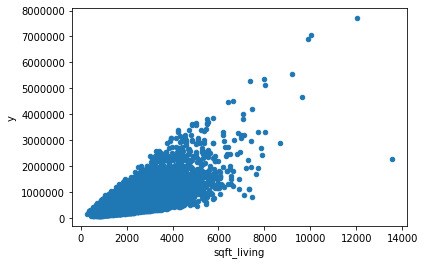

In [52]:
tmp[['sqft_living','y']].plot('sqft_living','y', 'scatter')

#### population beta, residuals

In [53]:
beta = linear_regress(X, y)
u = y - X @ beta

In [54]:
X.head(5)

,intercept,sqft_living
0,1,1180
1,1,2570
2,1,770
3,1,1960
4,1,1680


#### verify the assumption of u

In [55]:
print(u.mean()) # zero residual

0    5.975839e-10
dtype: float64


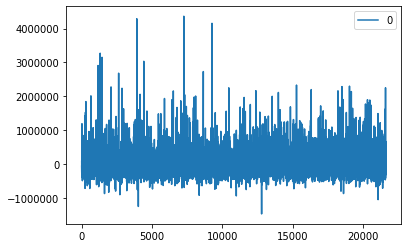

In [56]:
u.plot() # constant variance (magnitude); zero autocorrelation (clustering)

#### now we need to draw samples and estimate true beta

#### 100 experiments, draw 2000 samples each

In [60]:
result_list = []
for i in range(100): # 
    sample_choice = np.random.choice(df.index, size=2000, replace=False)
    sample = df.loc[sample_choice, :]
    y_sample = colvec(sample['price'])
    X_sample = add_intercept(sample[['sqft_living']])
    result_list.append(pd.DataFrame(linear_regress(X_sample, y_sample)))
result = pd.concat(result_list, axis=1).T
result.columns = ['b0','b1']

In [61]:
result.mean()

b0   -46675.088527
b1      282.106225
dtype: float64

In [62]:
beta

matrix([[-43580.74032709],
        [   280.62356663]])